<span style="font-size:10pt">AI-DL @ ENSPIMA / v1.5 september 2025 / Jean-Luc CHARLES (Jean-Luc.charles@mailo.com) / CC BY-SA 4.0 /</span>

<div class="alert alert-block alert-info"> 
<span style="color: #0000BB;font-weight: bold; font-size:large;">
    Copy this notebook in the <i>Notebooks</i> directory if you want to use it...
</span></div>

<div style="color:brown;font-family:arial;font-size:26pt;font-weight:bold;text-align:center"> 
Deep learning with Python tensorflow2/keras modules</div><br>
<hr>
<div style="color:blue;font-family:arial;font-size:22pt;font-weight:bold;text-align:center"> 
Training a Dense Neural Network to classify handwritten digits<br><br>
DNN-Part-1: Build and train a Dense Neural Network</div>
<hr>

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:12pt">  

It is important to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) to ensure versions of the Python interpreter and Python modules (like tensorflow, numpy...).

To do so, notebooks from this GitHub repository must be loaded with the command `uv run jupyter lab` or `uv run jupyter notebook`.
</span></div>

Load the notebooks in this order:
- `DL1_MNIST.ipynb`: check that the PVE is fully operationnal, load and use the data from the MNIST database (images and labels).
- `DL2_DNN_part1.ipynb`: build a Dense Neural Network (DNN), train it with data from the MNIST and evaluate its performance.
- `DL2_DNN_part2.ipynb`: reload a previously trained DNN and evaluate its performance with the MNIST test data.

## Targeted learning objectives
Know how to:
- build a dense neural network with the Python modules **tensorflow** and **keras**.
- train a dense network with data from the MNIST bank.
- display the training performance curves.
- save the structure and the weights of the trained network.

Expected duration : 120 minutes

## 1 - Verify importing Python modules
The **keras** module which allows high-level manipulation of **tensorflow** objects is integrated in the **tensorflow** (tf) module since version 2. <br>
The **tf.keras** module documentation to consult is here: https://www.tensorflow.org/api_docs/python/tf/keras.

Importing the `tensorflow` module in the cell below may generate some warning messages...<br>
if errors appear they must be corrected, possibly by recreating your PVE <b><span style="color: rgb(200, 51, 102);">pyml</span></b>:

In [1]:
import os, sys
# Delete the (numerous) warning messages from the **tensorflow** module:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# specific modules:
from utils.tools import scan_dir, plot_loss_accuracy

In [2]:
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")

Python    : 3.12.3
tensorflow: 2.16.2 incluant keras 3.9.2
numpy     : 1.26.4


Embedding matplotlib plots in the notebook:

In [3]:
%matplotlib inline

# Dense network structure to build
In this step you will build a **dense network**, with:
- an **input layer** of 784 values in the range [0 ; 1.]<br>
(the pixels of the MNIST 28 $\times$ 28 images put in the form of a vector of 784 normalized `float` numbers),
- a **hidden layer** of 784 neurons using the `relu` activation function,
- an **output layer** of 10 neurons, for the classification of images into 10 classes associated with the digits {0,1,2...9}, using the `softmax` activation function adapted to classification problems .

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/ReseauChiffres-2.png" alt="archiNetwork.png" style="width:900px;"><br>
    [image: JLC]
</p>

Remarks :
- Each neuron of the first hidden layer actually receives 785 inputs: the 784 values $x_i$ of the pixels of the image plus the bias.
- $\leadsto$ There are therefore 785 unknowns for each neuron: the 784 weights $w_i$ assigned to each input $x_i$, plus the weight $b$ assigned to the input $-1$.
- $\leadsto$ there are therefore 785 $\times$ 784 unknowns for the hidden layer and 785 $\times$ 10 unknowns for the output layer: i.e. a total of 623290 unknowns whose value must be optimized by the learning algorithm.

## Work to do
### 1 - Load MNIST images and define important parameters
### 2 - Pre-process MNIST images and labels
### 3 - Build the dense Neural Network 
### 4 - Save the struture & weights of the initial Network
### 5 - A first "naive" Network training 
### 6 - Train the Network while measuring its performance at each *epoch*
### 7 - Train the Network while measuring its performance at each *epoch* and managing the *over-fit*
### 8 - Save the struture & weights of the trained Network.<br>

### 1 - Load MNIST images and define important parameters

The work of loading MNIST images has already been seen in the *notebook* `ML1_MNIST.ipynb`:

In [4]:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()
print("im_train -> shape:", im_train.shape, ", dtype:", im_train.dtype,)
print("im_test  -> shape:", im_test.shape,  ", dtype:", im_test.dtype,)
print("lab_train-> shape:", lab_train.shape,  ", dtype:", lab_train.dtype)
print("lab_test -> shape:", lab_test.shape,  ", dtype:", lab_test.dtype)

im_train -> shape: (60000, 28, 28) , dtype: uint8
im_test  -> shape: (10000, 28, 28) , dtype: uint8
lab_train-> shape: (60000,) , dtype: uint8
lab_test -> shape: (10000,) , dtype: uint8


#### Define important parameters

To avoid "hard writing" the **number of training and test images**, the **dimension** of the images and the **number of classes** to recognize, these parameters are retrieved from existing object attributes:
- the `shape` attribute of the `im_train` and `im_test` tables allows to extract the number of training and test images,
- the `size` attribute of the first training (or test) image gives the number of pixels of the images (784),<br>
- the transformation of the `lab_test` array into a Python `set` (a set) gives the set of labels to recognize, whose size is the number of classes.

complete the cell below accordingly:

In [5]:
nb_im_train = im_train.shape[0]    # number of training images
nb_im_test  = im_test.shape[0]     # number of test images
nb_pixel    = im_train[0].size     # number of elements (pixels) of the firt training image
nb_class    = len(set(lab_test))   # number of classes to recognize (the ten digits from 0 to 9)

Checking:

In [6]:
print(f"{nb_im_train} traing images and {nb_im_test} test images")
print(f"{nb_pixel} pixels in each image")
print(f"{nb_class} classes to recognize (the digits from 0 to 9)")

60000 traing images and 10000 test images
784 pixels in each image
10 classes to recognize (the digits from 0 to 9)


## 2 - Pre-process MNIST images and labels

Two treatments must be applied to the data from the MNIST database:
- on the images: transform the matrices of  28$\,\times\,$28 pixels (`uint8`integers) into **normalized** vectors $(V_i)_{i=0..783}$ of 784 real values $V_i$ with $ 0 \leqslant V_i \leqslant 1$;
- on the labels: transform scalar numbers into *one-hot* vectors.

### Transform input matrices into normalized vectors

Define the arrays `x_train` and `x_test` containing the matrices of the arrays `im_train` and `im_test` *flattened* as normalized vectors (values between 0 and 1).<br>
*tips*:
- use the `reshape` method of the *ndarray* class of *numpy* and the `nb_im_train`, `nb_im_test` and `nb_pixel` parameters previously defined,
- normalization can be handled by dividing arrays by their max value.

In [7]:
x_train = im_train.reshape(nb_im_train, nb_pixel)/im_train.max()
x_test  = im_test.reshape(nb_im_test, nb_pixel)/im_test.max()

Check the dimensions of the `x_train` and `x_test` arrays as well as their *min* and *max* values:

In [8]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [10]:
x_test.min(), x_test.max()

(0.0, 1.0)

### *one-hot* encoding of labels:

Consult the documentation of the `to_categorical` function on the page [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) and deduce how to define the `y_train` and `y_test` arrays containing the *hot-one* encoded version of the `lab_train` and `lab_test` arrays:

In [11]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding' of labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

Visually check the first 10 values of the `lab_train` and `y_train` arrays:

In [12]:
print(lab_train[:10])
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 3 - Build the Dense Neural Network

We will now build a dense **sequential** neural network with **5 lines of Python** using the **keras** module.

Build the network incrementally in the cell below, following the proposed approach (look for the `add` method in the page [guide/keras/sequential_model](https://www.tensorflow.org/guide/keras/sequential_model) if necessary) :
- 1/ Create the object `model` instance of the class `Sequential` (cf [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).
- 2/ With the `add` method of the `model` object add:
    - the input layer: `Input(shape=<number of neurons>)` (cf [tf.keras.layers.Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input) )<br>
    Use the `nb_pixel` parameter to specify the value of the `shape` parameter which must be given as a `tuple`...<br>
    - the intermediate dense layer (cf [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)): `Dense(<number of neurons>, activation='relu')` (cf [tf.keras.activation.relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu))
    - the output dense layer: `Dense(<number of neurons>, activation='softmax')` (cf [tf.keras.activation.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)).<br>
Use the `nb_pixel` and `nb_classe` parameters to indicate the number of neurons and the number of classes without 'writing them hard'...
- 3/ Once built, the network must be compiled (in the sense of tensorflow) with the `compile` method and the arguments:
    - `loss='categorical_crossentropy'`: choice of the error function (cf [tf.keras.categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy))
    - `optimizer='adam'`: choice of Adam optimizer (see page [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) )
    - `metrics=['accuracy']` to obtain training statistics to draw performance curves.

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# set the seed of the random generators used by tensorflow:
SEED = 1234
tf.random.set_seed(SEED)
tf.config.experimental.enable_op_determinism()

# the 5 lines to build the neural network:
model = Sequential()
model.add(Input(shape=(nb_pixel,), name='input'))
model.add(Dense(nb_pixel, activation='relu', name='c1'))
model.add(Dense(nb_class, activation='softmax', name='c2'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

*Note*: By using the `name` argument in the `Input` and `Dense` constructors, you can give custom names to the layers, which will appear in the `summary` output bellow.

With the `summary` method of the `model` object, display the description of the model and check the dimensions...

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ c1 (Dense)                      │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ c2 (Dense)                      │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

Why are there some `None` in the "Output Shape" column?

Response: Because the number of images that will be used for training in not given at the DNN construction stage but later, et the training stage.

Find the total number of parameters with a simple formula...

In [15]:
785*784+785*10

623290

## 4 - Save the structure & weights of the initial Network

The `save` method of the `Sequential` class saves **the structure** and the **weights** of the trained DNN.<br>
You can use later the `tf.keras.models.load_model` function to recreate the network and reload its trained weights to exploit it in operational situation.

In [16]:
model_path = Path('models')

# Check wether the 'model' directory exist (create it if needed):
if not model_path.exists(): model_path.mkdir()

# save the structure and the weights of the current neural network:
model.save(model_path / "dense1_init.keras")

# display the tree beginning at f'./models/{key}':
print(f"\nFiles written:\n{scan_dir(f"./models")}")


Files written:
./models/dense1_trained.keras
./models/dense1_init.keras



## 5 - A first "naive" Network training 

If necessary, consult the documentation of the `fit` method on the page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

Complete the cell below to train the DNN with the `fit` method of the `model` object using the arguments:
- `x_train`: the 60000 flattened and normalized images
- `y_train`: the 60000 *one-hot* encoded labels.
- `epochs=10`: repeat the full training 10 times.
- `batch_size=128`: split the input data set (the 60000 images) into "batches" of size `batch_size` (here: batches of 128 images).<br>
Updating network weights is done after each batch of `batch_size` images.<br>
The value of `batch_size` is a parameter that influences the quality of the training but also its memory footprint: you can later try different values (64, 128, 256 ...) and observe how the quality of the training evolves).

Name `hist` the data returned by the `fit` method.

In [17]:
# load the network initial structure and weights:
model = tf.keras.models.load_model(model_path / 'dense1_init.keras') 

# Deterministic tensorflow training: 
# set the seed of the random generators inolved by tensorflow:
tf.keras.utils.set_random_seed(SEED)
# see https://blog.tensorflow.org/2022/05/whats-new-in-tensorflow-29.html
tf.config.experimental.enable_op_determinism() 

# train the DNN:
hist = model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10


/home/jlc/work/01-github.com_cjlux/AI-ML_at_ENSPIMA/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8772 - loss: 0.4308
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9660 - loss: 0.1129
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9796 - loss: 0.0685
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9867 - loss: 0.0451
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9923 - loss: 0.0300
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9948 - loss: 0.0209
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9968 - loss: 0.0148
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9979 - loss: 0.0110
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9983 - loss: 0.0089
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9985 - loss: 0.0073


Can you explain why there are 469 updates of the DNN weights per epoch ?

In [18]:
print(f" datat set size:{len(x_train)} divided by the batch_szie:{128} gives {len(x_train)/128}")

 datat set size:60000 divided by the batch_szie:128 gives 468.75


The `hist` object returned by the `fit` method has a `history` attribute of type `dict` whose keys `'loss'` and `'accuracy'` are associated with the corresponding values at each _epoch_:

In [19]:
hist.history.keys()

dict_keys(['accuracy', 'loss'])

In [20]:
hist.history['loss']

[0.2469424456357956,
 0.09779690951108932,
 0.06121768429875374,
 0.04079941660165787,
 0.027302006259560585,
 0.019158560782670975,
 0.014196068979799747,
 0.010788234882056713,
 0.00871390849351883,
 0.008098096586763859]

In [21]:
hist.history['accuracy']

[0.9291333556175232,
 0.9711166620254517,
 0.9822499752044678,
 0.9883166551589966,
 0.9932166934013367,
 0.9955000281333923,
 0.9969499707221985,
 0.9977666735649109,
 0.9982333183288574,
 0.99795001745224]

### Plot of the `loss` and `accuracy` curves

The `plot_loss_accuracy` function of the `utils.tools` module (found in the notebook directory) plots the "Model accuracy" and "Model loss" curves with the data stored in `hist`.<br> Import and use the `plot_loss_accuracy` function to plot these curves:

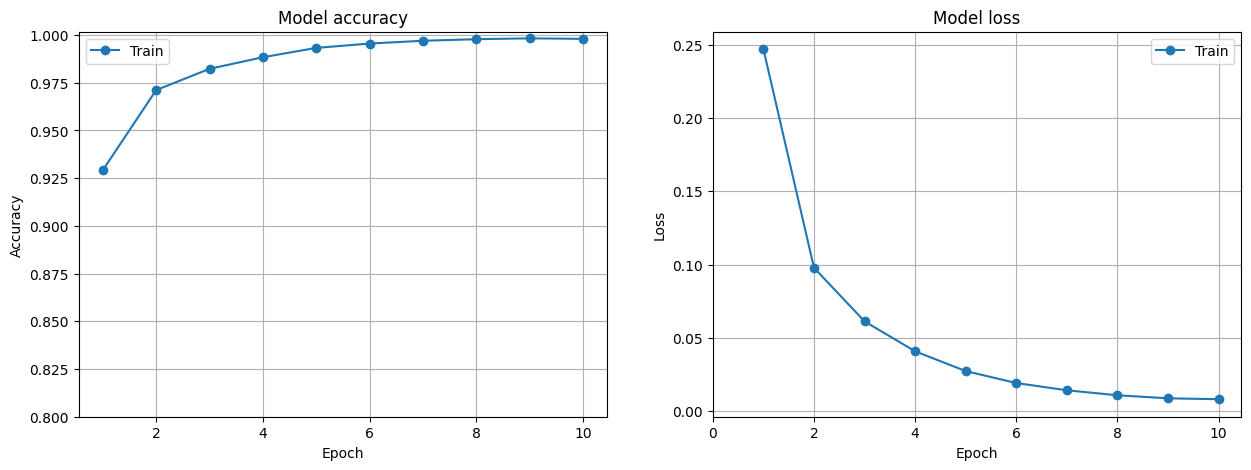

In [22]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

## 6 - Train the Network while measuring its performance at each *epoch*

To have a better indicator of the quality of the training, you can test at the end of each `epoch` the precision of the inferences of the trained network using the test data: just pass the `validation_data` argument to the `fit` method, assigning it the test data tuple `(x_test, y_test)`:

In [23]:
# load the network initial structure and weights:
model = tf.keras.models.load_model(model_path / 'dense1_init.keras') 

# Deterministic tensorflow training: 
# set the seed of the random generators inolved by tensorflow:
tf.keras.utils.set_random_seed(SEED)
# see https://blog.tensorflow.org/2022/05/whats-new-in-tensorflow-29.html
tf.config.experimental.enable_op_determinism() 

hist = model.fit(x_train, y_train,
                 epochs=10, 
                 batch_size=128,
                 validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8772 - loss: 0.4308 - val_accuracy: 0.9625 - val_loss: 0.1255
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9660 - loss: 0.1129 - val_accuracy: 0.9732 - val_loss: 0.0884
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9796 - loss: 0.0685 - val_accuracy: 0.9768 - val_loss: 0.0770
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9867 - loss: 0.0451 - val_accuracy: 0.9754 - val_loss: 0.0809
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9923 - loss: 0.0300 - val_accuracy: 0.9738 - val_loss: 0.0853
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9948 - loss: 0.0209 - val_accuracy: 0.9762 - val_loss: 0.0803
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9968 - loss: 0.0148 - val_accuracy: 0.9768 - val_loss: 0.0824
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9979 - loss: 0.0110 - val_accuracy: 0.

Now the `hist.history` dictionary has also the new keys `val_loss` and `val_accuracy` calculated with the test data:

In [24]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plot again the curves with the `plot_loss_accuracy` function:

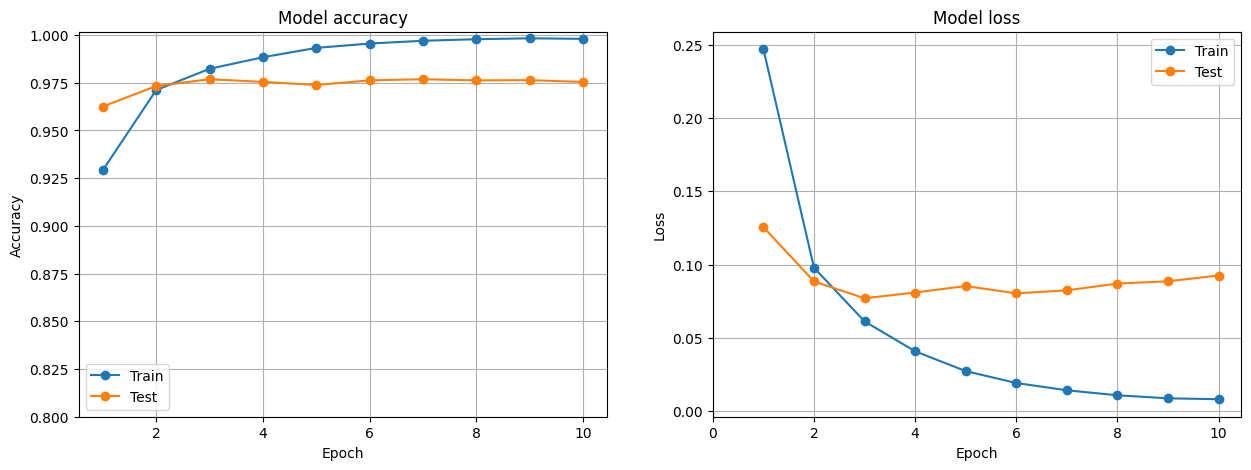

In [25]:
plot_loss_accuracy(hist)

the precision calculated with the test data tends towards a limit close to 98.3 %. You might think that increasing the value of `epochs` would improve the precision of the network... but you run the risk of over-training the network (*over-fit*)...

## 7 - Train the Network while measuring its performance at each *epoch* and managing the *over-fit*

The `Keras` module offers tools to automatically stop the training by monitoring for example the growth of precision (accuracy) from one `epoch` to another.<br>
You define the parameters of the `EarlyStopping` (cf [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)) *callback* and pass it to the method `fit` via the `callbacks` argument:

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# define the parameters of the `EarlyStopping`:
callbacks_list = [ 
    EarlyStopping(monitor='val_accuracy',  # the parameter to monitor
                  patience=2,              # accept that the parameter decreases only twice
                  restore_best_weights=True,
                  verbose=1)
]

# load the network initial structure and weights:
model = tf.keras.models.load_model(model_path / 'dense1_init.keras') 

# Deterministic tensorflow training: 
# set the seed of the random generators inolved by tensorflow:
tf.keras.utils.set_random_seed(SEED)
# see https://blog.tensorflow.org/2022/05/whats-new-in-tensorflow-29.html
tf.config.experimental.enable_op_determinism() 

hist = model.fit(x_train, y_train,
                 epochs=15, 
                 batch_size=128, 
                 validation_data=(x_test, y_test),
                 callbacks = callbacks_list)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8772 - loss: 0.4308 - val_accuracy: 0.9625 - val_loss: 0.1255
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9660 - loss: 0.1129 - val_accuracy: 0.9732 - val_loss: 0.0884
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0685 - val_accuracy: 0.9768 - val_loss: 0.0770
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9867 - loss: 0.0451 - val_accuracy: 0.9754 - val_loss: 0.0809
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9923 - loss: 0.0300 - val_accuracy: 0.9738 - val_loss: 0.0853
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 3.


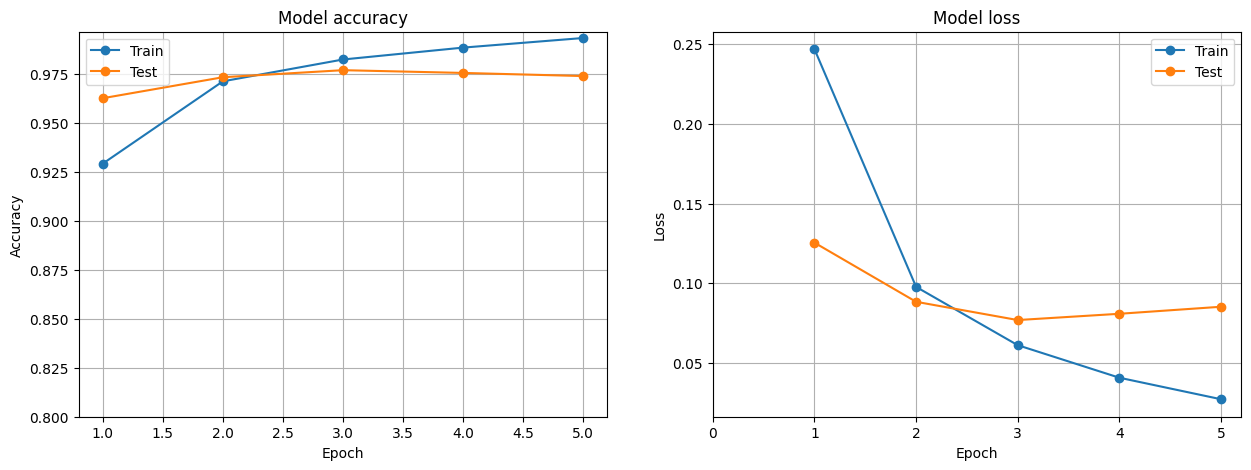

In [27]:
plot_loss_accuracy(hist)

Instead of monitoring the decrease of `val_accuracy` you can also monitor the increase of `val_loss`, which may be a prefeerd strategy (can you guess why ?):

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# define the parameters of the `EarlyStopping`:
callbacks_list = [ 
    EarlyStopping(monitor='val_loss',  # the parameter to monitor
                  patience=2,          # accept that 'val_loss' increases twice
                  restore_best_weights=True,
                  verbose=1)
]

# load the network initial structure and weights:
model = tf.keras.models.load_model(model_path / 'dense1_init.keras') 

# Deterministic tensorflow training: 
# set the seed of the random generators inolved by tensorflow:
tf.keras.utils.set_random_seed(SEED)
# see https://blog.tensorflow.org/2022/05/whats-new-in-tensorflow-29.html
tf.config.experimental.enable_op_determinism() 

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=15, 
                 batch_size=128, 
                 callbacks = callbacks_list)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8772 - loss: 0.4308 - val_accuracy: 0.9625 - val_loss: 0.1255
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9660 - loss: 0.1129 - val_accuracy: 0.9732 - val_loss: 0.0884
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0685 - val_accuracy: 0.9768 - val_loss: 0.0770
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9867 - loss: 0.0451 - val_accuracy: 0.9754 - val_loss: 0.0809
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9923 - loss: 0.0300 - val_accuracy: 0.9738 - val_loss: 0.0853
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 3.


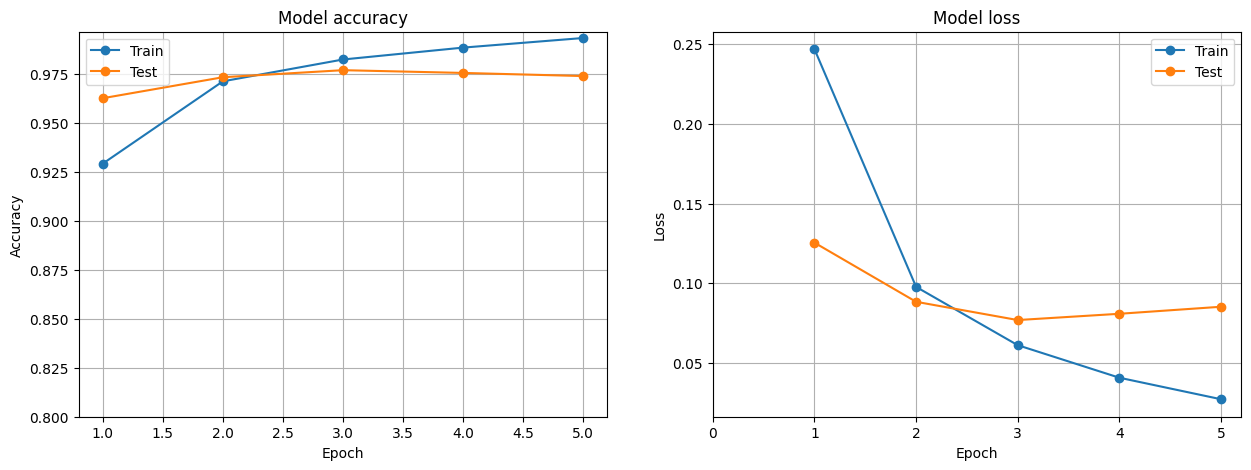

In [29]:
plot_loss_accuracy(hist)

## 8 - Save the structure & weights of the current trained Network

In [30]:
model_path = Path('models')

# save the structure and the weights of the current neural network:
model.save(model_path / "dense1_trained.keras")

# display the tree beginning at f'./models/{key}':
print(f"\nFiles written:\n{scan_dir(f"./models")}")


Files written:
./models/dense1_trained.keras
./models/dense1_init.keras



### Further work:
You can now load the `DL2_DNN_part2_en.ipynb` notebook to learn how to exploit the DNN you have just rained.

## Other interesting resources... videos:

In [31]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="400" height="300" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [32]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="400" height="300" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [33]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="400" height="300" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [34]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="400" height="300" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>